In [1]:
import numpy as np
import glob
import os
import argparse
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

In [2]:
from IsoScatter import xyz_simulation

In [5]:
input_filepath='./test_files/pt_sphere_25ang_radius.xyz'
# input_filepath = '/Users/keithwhite/repos/run_fullrmc/md_sim/PbI2_DMSO_0p8M_berendsen_last_frame_update.xyz'
# input_filepath = '/Users/keithwhite/repos/IsoScatter/example/pbi2_dmso_0p8m_slab__rect_cut150x150x150.xyz'
q_min=0.01
q_max=2
num_qs=200
logspace_q=True
vol_pct=0 #only for hull_method
solvent_edens = 0 #only for hull method
block_size = None
# block_size = 1000
hull_method = False

if logspace_q:
    q_min = np.log10(q_min)
    q_max = np.log10(q_max)
    qs = np.logspace(q_min, q_max, num_qs)
else:
    qs = np.linspace(q_min, q_max, num_qs)

print(f"q_min: {q_min}, q_max: {q_max}")

q_min: -2.0, q_max: 0.3010299956639812


In [6]:
%%time

iq = xyz_simulation(input_filepath, qs, vol_pct, solvent_edens, block_size, hull_method=hull_method)

Determined block size: 100
Number of Max Workers:  9


  0%|          | 0/42 [00:00<?, ?it/s]

104928164121.81482
CPU times: user 55.5 s, sys: 1.18 s, total: 56.7 s
Wall time: 7.69 s


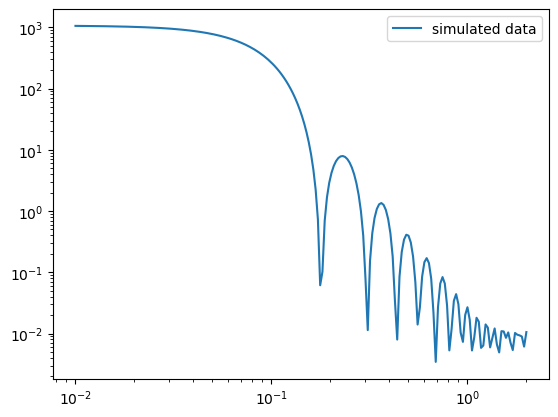

In [7]:
fig, ax1 = subplots(1,1)
ax1.plot(qs, iq/1e8, label='simulated data')
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.legend()

In [7]:
exp_data = np.loadtxt('./test_files/pt_sphere_25ang_0p01VF_solv0.txt')

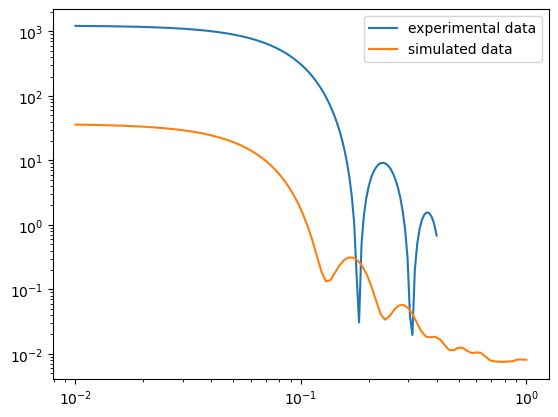

In [8]:
fig, ax1 = subplots(1,1)
exp_data = np.loadtxt('./test_files/pt_sphere_25ang_0p01VF_solv0.txt')
ax1.plot(exp_data[:,0], exp_data[:,1], label='experimental data')
ax1.plot(qs, iq/1e8, label='simulated data')
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.legend()

In [ ]:
import numpy as np

def square_to_condensed(square_matrix):
    """Convert a squareform distance matrix to a condensed form."""
    n = square_matrix.shape[0]
    if square_matrix.shape[1] != n:
        raise ValueError("Input must be a square matrix.")
    # Number of elements in the condensed form
    m = n * (n - 1) // 2
    condensed_matrix = np.zeros(m)
    k = 0
    for i in range(1, n):
        for j in range(i):
            condensed_matrix[k] = square_matrix[i, j]
            k += 1
    return condensed_matrix

# Example usage
square_matrix = np.array([[0, 1, 2],
                          [1, 0, 3],
                          [2, 3, 0]])
condensed_matrix = square_to_condensed(square_matrix)
print(condensed_matrix)
